In [1]:
import pandas as pd
import preprocessing 


df = pd.read_csv("/home/aboveclouds49/so_many_rev.csv")

df.isna().any()

/home/aboveclouds49/miniconda3/envs/new_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


rating    False
text      False
dtype: bool

# pre processed /  no drops

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aboveclouds49/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/aboveclouds49/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/aboveclouds49/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
review_file_path = "/home/aboveclouds49/so_many_rev.csv" 

try:
    df_processed_reviews = preprocessing.preprocess_reviews(review_file_path)
    print(df_processed_reviews.shape)
    

except Exception as e:
    print(f"Preprocessing failed. See logs for details. Error: {e}")


2025-02-20 18:17:58,459 - INFO - Starting preprocess_reviews function with chunk size: 10000
2025-02-20 18:17:58,460 - INFO - Loading review dataset.
2025-02-20 18:17:58,460 - INFO - Loading from CSV file: /home/aboveclouds49/so_many_rev.csv
Processing review chunks: 7it [00:35,  5.07s/it]
2025-02-20 18:18:33,982 - INFO - Finished preprocess_reviews function


(60875, 4)


2025-02-20 18:18:33,989 - INFO - Starting compare_rating_sentiment function


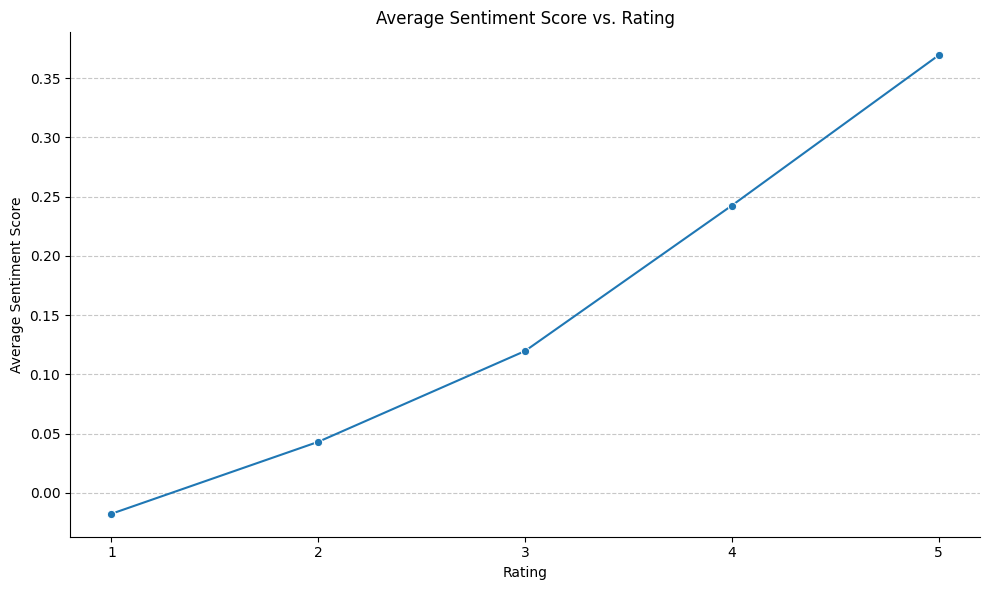

2025-02-20 18:18:34,160 - INFO - Plot 'Average Sentiment Score vs. Rating' generated and displayed.
2025-02-20 18:18:34,161 - INFO - Finished compare_rating_sentiment function


In [4]:
preprocessing.compare_rating_sentiment(df_processed_reviews)

In [5]:
all_models_results_df = preprocessing.train_evaluate_concurrently(df_processed_reviews)
all_models_results_df


[18:18:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.



Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 1.15072


/home/aboveclouds49/miniconda3/envs/new_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/aboveclouds49/miniconda3/envs/new_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/aboveclouds49/comparison/preprocessing.py:191: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{'Metric': 'Validation Accuracy', 'Value': accuracy_val, 'Model': 'LGBM'}])], ignore_index=True)
/home/aboveclouds49/comparison/preprocessing.py:234: Futur

Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 1.15072


/home/aboveclouds49/miniconda3/envs/new_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/aboveclouds49/miniconda3/envs/new_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/aboveclouds49/comparison/preprocessing.py:191: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{'Metric': 'Validation Accuracy', 'Value': accuracy_val, 'Model': 'LGBM'}])], ignore_index=True)
/home/aboveclouds49/miniconda3/envs/new_env/lib/python3.12

,Metric,Value,Model
0,Validation Accuracy,0.510883,LGBM
1,Validation Macro F1 Score,0.503048,LGBM
2,Validation Macro ROC AUC,0.814535,LGBM
3,Validation Accuracy,0.500123,XGBoost
4,Validation Macro F1 Score,0.490969,XGBoost
5,Validation Macro ROC AUC,0.805724,XGBoost


In [6]:



preprocessing.calculate_lexical_diversity_optimized("/home/aboveclouds49/so_many_rev.csv")

(np.float64(0.3678340556927221), 'text')

# preprocessed / dropped n<10

In [7]:

input_csv_file = '/home/aboveclouds49/so_many_rev.csv'
output_csv_file = 'word_counts_output.csv'
specific_column_name = 'text' 

# Example 1: Automatic column detection
preprocessing.count_words_in_csv(input_csv_file, output_csv_file) 

# Example 2: Specifying a column name
# count_words_in_csv(input_csv_file, output_csv_file, col_name=specific_column_name) 

2025-02-20 18:22:45,444 - INFO - Starting count_words_in_csv function with chunk size: 10000, CSV: /home/aboveclouds49/so_many_rev.csv
2025-02-20 18:22:45,445 - INFO - Reading CSV in chunks from: /home/aboveclouds49/so_many_rev.csv
Processing CSV chunks: 0it [00:00, ?it/s]2025-02-20 18:22:45,495 - INFO - Automatically selected text column: text
Processing CSV chunks: 1it [00:00,  1.83it/s]2025-02-20 18:22:46,039 - INFO - Automatically selected text column: text
Processing CSV chunks: 2it [00:00,  2.31it/s]2025-02-20 18:22:46,389 - INFO - Automatically selected text column: text
Processing CSV chunks: 3it [00:01,  2.55it/s]2025-02-20 18:22:46,734 - INFO - Automatically selected text column: text
Processing CSV chunks: 4it [00:01,  2.67it/s]2025-02-20 18:22:47,075 - INFO - Automatically selected text column: text
Processing CSV chunks: 5it [00:01,  2.87it/s]2025-02-20 18:22:47,372 - INFO - Automatically selected text column: text
Processing CSV chunks: 6it [00:02,  3.12it/s]2025-02-20 18

In [8]:
word_counts_file = '/home/aboveclouds49/comparison/word_counts_output.csv'
data_file = '/home/aboveclouds49/so_many_rev.csv'

try:
    filtered_df_auto_col = preprocessing.filter_words_dataframe(
        word_count_csv_path=word_counts_file,
        object_df_or_path=data_file 
    )
    print("\nFiltered DataFrame (from CSV paths, auto-detected column):")
except Exception as e:
    print(f"Error in Example 2: {e}")


2025-02-20 18:22:47,780 - INFO - Starting filter_words_dataframe function. Word count CSV: /home/aboveclouds49/comparison/word_counts_output.csv, Threshold: 10
2025-02-20 18:22:47,781 - INFO - Loading word count CSV from: /home/aboveclouds49/comparison/word_counts_output.csv
2025-02-20 18:22:47,806 - INFO - Found 36411 low-count words (count < 10).
2025-02-20 18:22:47,807 - INFO - Loading object DataFrame from CSV: /home/aboveclouds49/so_many_rev.csv
2025-02-20 18:22:48,047 - INFO - Automatically selected text column for filtering: text
2025-02-20 18:22:48,048 - INFO - Filtering low-count words from column: 'text'
100%|██████████| 60875/60875 [00:00<00:00, 113041.73it/s]
2025-02-20 18:22:48,595 - INFO - Low-count words filtering applied to column 'text'.
2025-02-20 18:22:48,595 - INFO - Finished filter_words_dataframe function.



Filtered DataFrame (from CSV paths, auto-detected column):


In [9]:
import pandas as pd
import re
from textblob import TextBlob
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import logging
from typing import Tuple, Union
import traceback
from tqdm import tqdm

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def preprocess_reviews(review_data: Union[str, pd.DataFrame], chunk_size: int = 10000) -> Tuple[object, pd.Series, pd.DataFrame]:
    """
    Preprocesses review text data for sentiment analysis and feature extraction.
    Accepts either a CSV file path or a Pandas DataFrame as input, and uses the "text" column.

    Args:
        review_data (Union[str, pd.DataFrame]): Path to the CSV file or a Pandas DataFrame
                                                 containing review data with a "text" column.
        chunk_size (int): Number of rows to process in each chunk (if loading from CSV).

    Returns:
        Tuple[object, pd.Series, pd.DataFrame]: A tuple containing:
            - X (object): TF-IDF vectorized features.
            - y (pd.Series): Target variable (ratings).
            - df_reviews (pd.DataFrame): Processed DataFrame.
    """
    logging.info(f"Starting preprocess_reviews function with chunk size: {chunk_size}")

    try:
        logging.info("Loading review dataset.")
        if isinstance(review_data, str):
            logging.info(f"Loading from CSV file: {review_data}")
            review_chunks = pd.read_csv(review_data, chunksize=chunk_size)
        elif isinstance(review_data, pd.DataFrame):
            logging.info("Using DataFrame object as input.")
            review_chunks = [review_data] # Process as a single chunk if DataFrame is provided
        else:
            raise TypeError("Input review_data must be a CSV file path or a Pandas DataFrame.")

        processed_chunks = []

        lemmatizer = WordNetLemmatizer()
        stop_words = set(stopwords.words('english'))

        for chunk_df in tqdm(review_chunks, desc="Processing review chunks"):
            try:
                if 'text' not in chunk_df.columns:
                    raise ValueError("Input DataFrame or CSV must contain a 'text' column.")

                chunk_df['text'] = chunk_df['text'].astype(str)
                chunk_df['rating'] = pd.to_numeric(chunk_df['rating'], errors='coerce')

                chunk_df['comment_length'] = chunk_df['text'].str.len()

                chunk_df['sentiment'] = chunk_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

                chunk_df['text'] = chunk_df['text'].str.lower()
                chunk_df['text'] = chunk_df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x)))

                def remove_stopwords_and_lemmatize(text: str) -> str:
                    words = text.split()
                    words = [word for word in words if word not in stop_words]
                    words = [lemmatizer.lemmatize(word) for word in words]
                    words = [lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in words]
                    return ' '.join(words)

                chunk_df['text'] = chunk_df['text'].apply(remove_stopwords_and_lemmatize)

                chunk_df_cleaned = chunk_df.dropna(subset=['rating', 'text'])
                processed_chunks.append(chunk_df_cleaned)

            except Exception as e_inner:
                logging.error(f"Error processing chunk: {e_inner}")
                logging.error(traceback.format_exc())

        df_reviews = pd.concat(processed_chunks, ignore_index=True)

        logging.info("Starting TF-IDF vectorization")
        tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
        X = tfidf.fit_transform(df_reviews['text'])

        y = df_reviews['rating']

        logging.info("Finished preprocess_reviews function")
        return X, y, df_reviews

    except FileNotFoundError as fnfe:
        logging.error(f"File not found: {fnfe}")
        logging.error(traceback.format_exc())
        raise
    except TypeError as te:
        logging.error(f"Type error: {te}. Input must be a CSV file path or a Pandas DataFrame.")
        logging.error(traceback.format_exc())
        raise
    except ValueError as ve:
        logging.error(f"Value error: {ve}. Ensure DataFrame or CSV has 'text' and 'rating' columns.")
        logging.error(traceback.format_exc())
        raise
    except Exception as e_outer:
        logging.error(f"An error occurred during preprocessing: {e_outer}")
        logging.error(traceback.format_exc())
        raise



X, y, df_processed_filtered = preprocess_reviews(review_data=filtered_df_auto_col) # Pass the DataFrame object


2025-02-20 18:22:48,615 - INFO - Starting preprocess_reviews function with chunk size: 10000
2025-02-20 18:22:48,616 - INFO - Loading review dataset.
2025-02-20 18:22:48,617 - INFO - Using DataFrame object as input.
Processing review chunks: 100%|██████████| 1/1 [00:32<00:00, 32.58s/it]
2025-02-20 18:23:21,204 - INFO - Starting TF-IDF vectorization
2025-02-20 18:23:22,382 - INFO - Finished preprocess_reviews function


In [10]:
df_processed_filtered.head()

,rating,text,comment_length,sentiment
0,1,extremely pricey specifically ask interest rea...,413,0.081818
1,1,wrong part order first salesman second time or...,414,-0.337500
2,1,order cancel without explanation regardless re...,124,0.000000
3,1,review cookflightscom connect review cook trav...,183,-0.250000
4,1,put month away bank account dont touch month p...,427,0.125000


2025-02-20 18:23:22,399 - INFO - Starting compare_rating_sentiment function


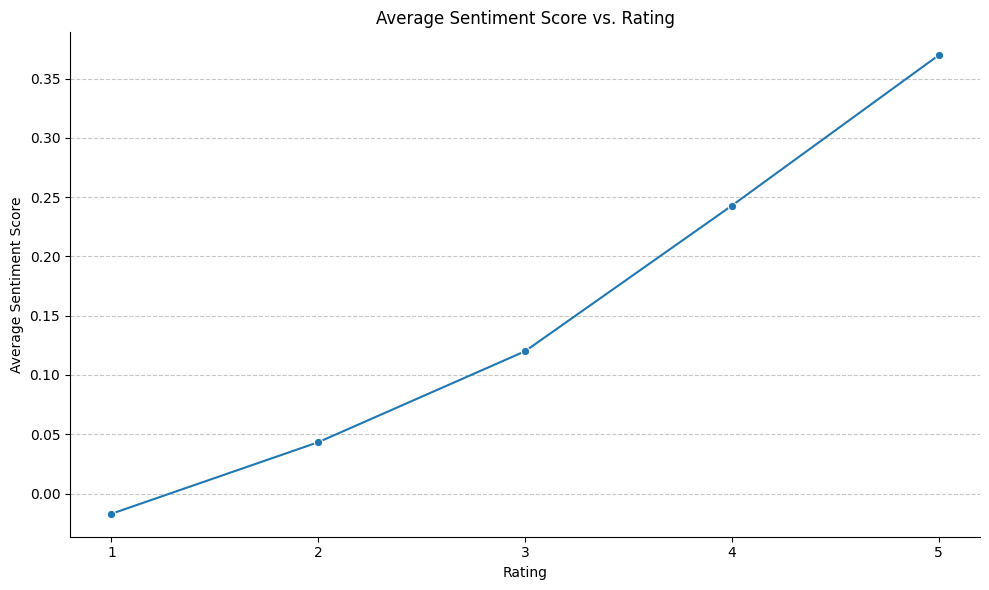

2025-02-20 18:23:22,553 - INFO - Plot 'Average Sentiment Score vs. Rating' generated and displayed.
2025-02-20 18:23:22,554 - INFO - Finished compare_rating_sentiment function


In [11]:
preprocessing.compare_rating_sentiment(df_processed_filtered)

In [12]:





mattr_score_df, column_name_df = preprocessing.calculate_lexical_diversity_optimized(df_processed_filtered)

mattr_score_df


np.float64(0.1042196006059585)

In [13]:
dropped_values = preprocessing.train_evaluate_concurrently(df_processed_filtered)
dropped_values


[18:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.



Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 1.15135


/home/aboveclouds49/miniconda3/envs/new_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/aboveclouds49/miniconda3/envs/new_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/aboveclouds49/comparison/preprocessing.py:191: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{'Metric': 'Validation Accuracy', 'Value': accuracy_val, 'Model': 'LGBM'}])], ignore_index=True)
/home/aboveclouds49/comparison/preprocessing.py:234: Futur

Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 1.15135


/home/aboveclouds49/miniconda3/envs/new_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/aboveclouds49/miniconda3/envs/new_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/aboveclouds49/comparison/preprocessing.py:191: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{'Metric': 'Validation Accuracy', 'Value': accuracy_val, 'Model': 'LGBM'}])], ignore_index=True)
/home/aboveclouds49/miniconda3/envs/new_env/lib/python3.12

,Metric,Value,Model
0,Validation Accuracy,0.510637,LGBM
1,Validation Macro F1 Score,0.502504,LGBM
2,Validation Macro ROC AUC,0.814086,LGBM
3,Validation Accuracy,0.497988,XGBoost
4,Validation Macro F1 Score,0.488280,XGBoost
5,Validation Macro ROC AUC,0.806747,XGBoost


# Lexical Diversity

Processing Company Groups: 100%|██████████| 104/104 [15:31<00:00,  8.96s/it]
/var/folders/xh/2_ykktld4lz_4rb5ny5cphk40000gn/T/ipykernel_22383/1972620731.py:93: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show() # Display the plot


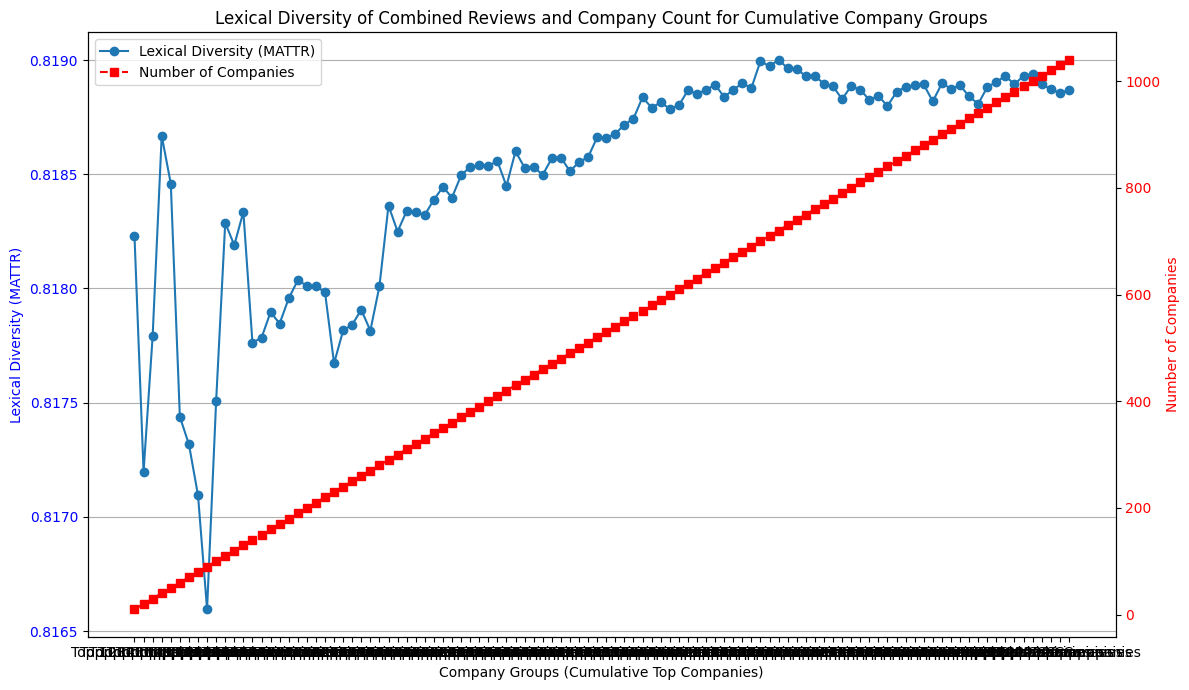

In [4]:
import preprocessing 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, Optional, Callable
from tqdm import tqdm

def plot_lexical_diversity_by_company_optimized(csv_path: str, lexical_diversity_func: Callable, text_column_name: str = 'cust_review_text', company_column_name: str = 'company', reviews_column_name: str = 'cust_reviews', window_size: int = 50) -> plt.Figure:
    """
    Generates a line plot of lexical diversity for cumulatively increasing groups of companies,
    calculated on the combined reviews of all companies in each group. Optimized for performance.

    Args:
        csv_path: Path to the CSV file.
        lexical_diversity_func: Function to calculate lexical diversity.
        text_column_name: Name of the column containing review text.
        company_column_name: Name of the column containing company names.
        reviews_column_name: Name of the column containing review counts.
        window_size: Window size for lexical diversity calculation.

    Returns:
        A matplotlib Figure object containing the line plot.
    """
    try:
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        raise FileNotFoundError(f"CSV file not found at: {csv_path}")

    if company_column_name not in df.columns:
        raise ValueError(f"Column '{company_column_name}' not found in CSV.")
    if text_column_name not in df.columns:
        raise ValueError(f"Column '{text_column_name}' not found in CSV.")
    if reviews_column_name not in df.columns:
        raise ValueError(f"Column '{reviews_column_name}' not found in CSV.")

    # 1. Pre-aggregate reviews per company (still useful for efficiency)
    company_reviews_dict = df.groupby(company_column_name)[text_column_name].agg(lambda x: ' '.join(x.astype(str))).to_dict()
    unique_companies = list(company_reviews_dict.keys())
    num_companies = len(unique_companies)
    iterations = range(10, num_companies + 1, 10)

    diversity_scores = [] # Changed to diversity_scores (singular)
    company_counts = []
    group_labels = []

    for num_companies_in_group in tqdm(iterations, desc="Processing Company Groups"):
        company_group = unique_companies[:num_companies_in_group]

        # 2. Combine reviews from ALL companies in the group into ONE string
        group_reviews_combined_list = [company_reviews_dict[company] for company in company_group] # Get pre-aggregated reviews
        group_reviews_combined_text = ' '.join(group_reviews_combined_list) # Combine into a single string

        # 3. Calculate lexical diversity for the COMBINED text
        diversity_score, _ = lexical_diversity_func(pd.DataFrame({text_column_name: [group_reviews_combined_text]}), window_size=window_size, col_name=text_column_name) # Calculate for combined text


        diversity_scores.append(diversity_score) # Append SINGLE diversity score
        company_counts.append(num_companies_in_group)
        group_labels.append(f"Top {num_companies_in_group} Companies")

    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Plot Lexical Diversity (primary y-axis)
    line1, = ax1.plot(group_labels, diversity_scores, marker='o', linestyle='-', label='Lexical Diversity (MATTR)') # Plot SINGLE diversity scores
    ax1.set_xlabel("Company Groups (Cumulative Top Companies)")
    ax1.set_ylabel("Lexical Diversity (MATTR)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True, axis='y')

    # Create secondary y-axis for Company Count
    ax2 = ax1.twinx()
    line2, = ax2.plot(group_labels, company_counts, marker='s', linestyle='--', color='red', label='Number of Companies')
    ax2.set_ylabel("Number of Companies", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    ax1.set_title("Lexical Diversity of Combined Reviews and Company Count for Cumulative Company Groups") # Updated title
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Combine legends from both axes
    lines = [line1, line2]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left')

    return fig




path = "/Users/notagain/Desktop/trust_pilot/h_stacking/trustpilot_reviews.csv"
plot = plot_lexical_diversity_by_company_optimized(path, preprocessing.calculate_lexical_diversity_optimized)
plot.show() 
# plot.savefig("lexical_diversity_plot.png")

Processing Cumulative Samples: 100%|██████████| 61/61 [05:55<00:00,  5.82s/it]
/var/folders/xh/2_ykktld4lz_4rb5ny5cphk40000gn/T/ipykernel_22383/1617177090.py:168: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_cumulative_sample.show()


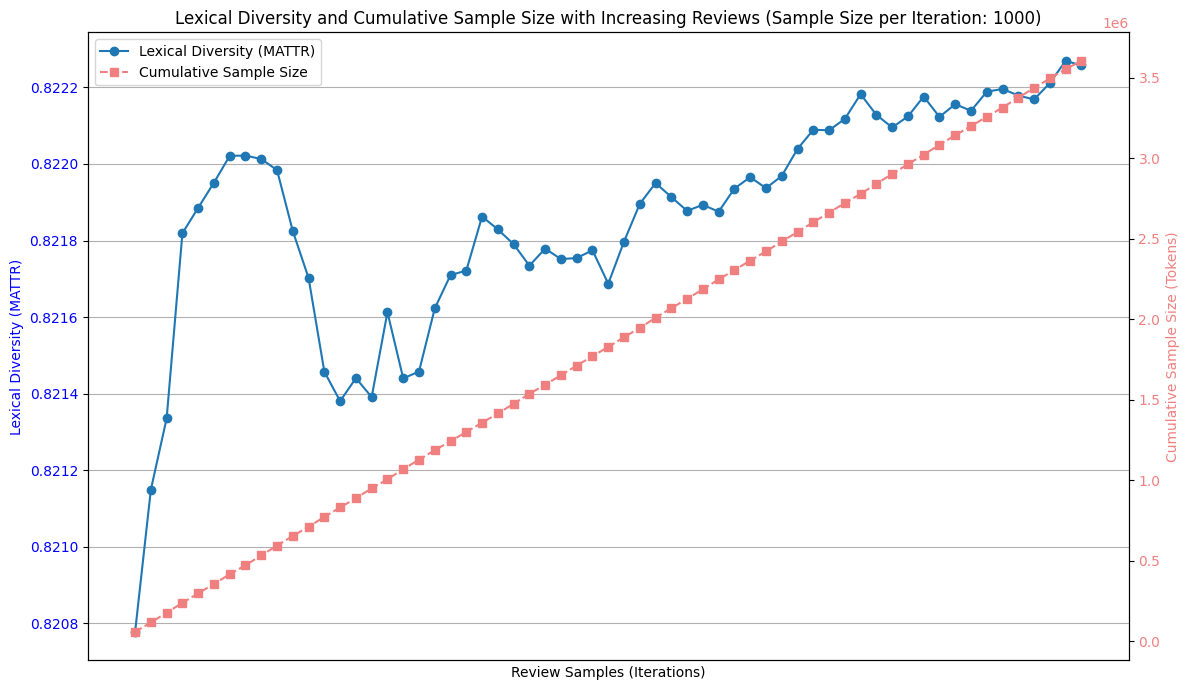

In [10]:
import preprocessing  # Assuming your calculate_lexical_diversity_optimized is in preprocessing.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, Optional, Callable
from tqdm import tqdm

def calculate_lexical_diversity_optimized(df_or_path: Union[pd.DataFrame, str], window_size: int = 50, col_name: Optional[str] = None) -> tuple[float, Optional[str]]:
    """
    Calculates Moving Average Type-Token Ratio (MATTR) on a text column
    in a Pandas DataFrame or CSV file.
    Args:
        df_or_path: Pandas DataFrame or path to a CSV file.
        window_size: Window size for MATTR calculation (number of tokens in each window).
        col_name: Optional column name to use for calculation. If None, the function
                  will automatically select the longest text column (object dtype).
    Returns:
        A tuple containing:
        - MATTR score (float) or NaN if no suitable text column is found.
        - Column name used for calculation (str or None if no column was used).
    """
    if isinstance(df_or_path, str):
        try:
            df = pd.read_csv(df_or_path)
        except FileNotFoundError:
            raise FileNotFoundError(f"CSV file not found at: {df_or_path}")
    elif isinstance(df_or_path, pd.DataFrame):
        df = df_or_path
    else:
        raise TypeError("Input must be a Pandas DataFrame or a path to a CSV file.")
    object_cols = df.select_dtypes(include='object').columns
    if col_name:
        if col_name not in df.columns:
            raise ValueError(f"Column name '{col_name}' not found in DataFrame.")
        if df[col_name].dtype != 'object':
            print(f"Warning: Column '{col_name}' is not of 'object' dtype. Proceeding, but ensure it contains text data.")
        longest_text_col = col_name
    else:
        if not object_cols.any():
            return np.nan, None
        if len(object_cols) > 1:
            avg_lengths = df[object_cols].apply(lambda col: col.str.len().mean())
            longest_text_col = avg_lengths.idxmax()
        else:
            longest_text_col = object_cols[0]
    text_series = df[longest_text_col].astype(str)
    def calculate_mattr_series(text_series, window_size):
        """Calculates MATTR for a Pandas Series of text, optimized for vector operations."""
        tokenized_series = text_series.str.lower().str.findall(r'\w+')
        def get_ttr_window(tokens):
            if not tokens:
                return 0.0
            return len(set(tokens)) / len(tokens)
        mattr_scores = []
        for tokens_list in tokenized_series:
            if not tokens_list:
                mattr_scores.append(0.0)
            else:
                window_ttrs = []
                for i in range(0, len(tokens_list) - window_size + 1, 1):
                    window = tokens_list[i:i + window_size]
                    window_ttrs.append(get_ttr_window(window))
                if window_ttrs:
                    mattr_scores.append(np.mean(window_ttrs))
                else:
                    mattr_scores.append(0.0)
        return np.nanmean(mattr_scores)
    mattr_value = calculate_mattr_series(text_series, window_size)
    return mattr_value, longest_text_col


def plot_lexical_diversity_cumulative_sample(csv_path: str, lexical_diversity_func: Callable, text_column_name: str = 'text', sample_size: int = 5000, window_size: int = 50) -> plt.Figure:
    """
    Generates a line plot of lexical diversity and cumulative sample size for cumulatively increasing
    random samples of reviews from a single text column, without replacement.

    Args:
        csv_path: Path to the CSV file.
        lexical_diversity_func: Function to calculate lexical diversity.
        text_column_name: Name of the column containing review text.
        sample_size: Number of reviews to add in each iteration to the cumulative sample.
        window_size: Window size for lexical diversity calculation.

    Returns:
        A matplotlib Figure object containing the line plot.
    """
    try:
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        raise FileNotFoundError(f"CSV file not found at: {csv_path}")

    if text_column_name not in df.columns:
        raise ValueError(f"Column '{text_column_name}' not found in CSV.")

    text_series = df[text_column_name].dropna()
    all_indices = text_series.index.tolist()
    num_total_reviews = len(all_indices)
    iterations = range(1, (num_total_reviews // sample_size) + 2)

    diversity_scores = []
    cumulative_sample_counts = []
    iteration_labels = []
    sampled_indices = set()
    cumulative_reviews_text = "" # Initialize an empty string to accumulate reviews

    for i in tqdm(iterations, desc="Processing Cumulative Samples"):
        remaining_indices = list(set(all_indices) - sampled_indices)
        if not remaining_indices:
            break

        current_sample_size = min(sample_size, len(remaining_indices))
        if current_sample_size <= 0:
            break

        sample_index = np.random.choice(remaining_indices, size=current_sample_size, replace=False)
        sampled_indices.update(sample_index)

        sampled_reviews = text_series.loc[sample_index]
        current_sample_reviews_text = ' '.join(sampled_reviews.astype(str))

        cumulative_reviews_text += " " + current_sample_reviews_text # Append current sample to cumulative text

        diversity_score, _ = lexical_diversity_func(pd.DataFrame({text_column_name: [cumulative_reviews_text]}), window_size=window_size, col_name=text_column_name)
        diversity_scores.append(diversity_score)
        cumulative_sample_counts.append(len(cumulative_reviews_text.split())) # Count tokens in cumulative text (approximate review count)
        iteration_labels.append(f"Sample {i}")


    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Plot Lexical Diversity (primary y-axis)
    line1, = ax1.plot(iteration_labels, diversity_scores, marker='o', linestyle='-', label='Lexical Diversity (MATTR)')
    ax1.set_xlabel("Review Samples (Iterations)")
    ax1.set_ylabel("Lexical Diversity (MATTR)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True, axis='y')

    # Create secondary y-axis for Cumulative Sample Size
    ax2 = ax1.twinx()
    line2, = ax2.plot(iteration_labels, cumulative_sample_counts, marker='s', linestyle='--', color='lightcoral', label='Cumulative Sample Size') # Light red color
    ax2.set_ylabel("Cumulative Sample Size (Tokens)", color='lightcoral')
    ax2.tick_params(axis='y', labelcolor='lightcoral')

    ax1.set_title(f"Lexical Diversity and Cumulative Sample Size with Increasing Reviews (Sample Size per Iteration: {sample_size})")
    plt.xticks(rotation=45, ha='right')
    ax1.set_xticks([]) # Remove x-axis ticks
    plt.tight_layout()

    # Combine legends
    lines = [line1, line2]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left')


    return fig





# plot_cumulative_sample.savefig("lexical_diversity_cumulative_sample_plot_5000.png")

# Example Usage
path = "/Users/notagain/final_project_results/test_/so_many_rev.csv" # Replace with your actual path

plot_cumulative_sample = plot_lexical_diversity_cumulative_sample(path, calculate_lexical_diversity_optimized, sample_size=1000) # Using sample_size=5000
plot_cumulative_sample.show()

Processing Cumulative Samples: 100%|██████████| 141/141 [24:25<00:00, 10.39s/it]
/var/folders/xh/2_ykktld4lz_4rb5ny5cphk40000gn/T/ipykernel_22383/711462484.py:168: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_cumulative_sample.show()


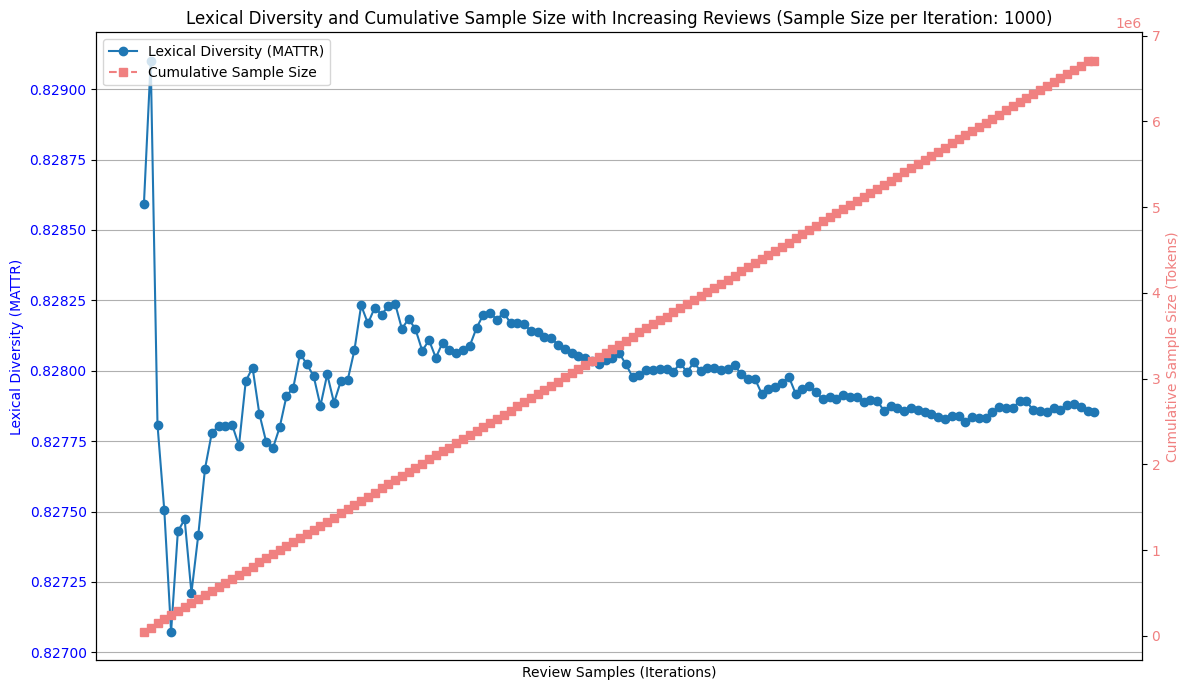

In [13]:
import preprocessing  # Assuming your calculate_lexical_diversity_optimized is in preprocessing.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, Optional, Callable
from tqdm import tqdm

def calculate_lexical_diversity_optimized(df_or_path: Union[pd.DataFrame, str], window_size: int = 50, col_name: Optional[str] = None) -> tuple[float, Optional[str]]:
    """
    Calculates Moving Average Type-Token Ratio (MATTR) on a text column
    in a Pandas DataFrame or CSV file.
    Args:
        df_or_path: Pandas DataFrame or path to a CSV file.
        window_size: Window size for MATTR calculation (number of tokens in each window).
        col_name: Optional column name to use for calculation. If None, the function
                  will automatically select the longest text column (object dtype).
    Returns:
        A tuple containing:
        - MATTR score (float) or NaN if no suitable text column is found.
        - Column name used for calculation (str or None if no column was used).
    """
    if isinstance(df_or_path, str):
        try:
            df = pd.read_csv(df_or_path)
        except FileNotFoundError:
            raise FileNotFoundError(f"CSV file not found at: {df_or_path}")
    elif isinstance(df_or_path, pd.DataFrame):
        df = df_or_path
    else:
        raise TypeError("Input must be a Pandas DataFrame or a path to a CSV file.")
    object_cols = df.select_dtypes(include='object').columns
    if col_name:
        if col_name not in df.columns:
            raise ValueError(f"Column name '{col_name}' not found in DataFrame.")
        if df[col_name].dtype != 'object':
            print(f"Warning: Column '{col_name}' is not of 'object' dtype. Proceeding, but ensure it contains text data.")
        longest_text_col = col_name
    else:
        if not object_cols.any():
            return np.nan, None
        if len(object_cols) > 1:
            avg_lengths = df[object_cols].apply(lambda col: col.str.len().mean())
            longest_text_col = avg_lengths.idxmax()
        else:
            longest_text_col = object_cols[0]
    text_series = df[longest_text_col].astype(str)
    def calculate_mattr_series(text_series, window_size):
        """Calculates MATTR for a Pandas Series of text, optimized for vector operations."""
        tokenized_series = text_series.str.lower().str.findall(r'\w+')
        def get_ttr_window(tokens):
            if not tokens:
                return 0.0
            return len(set(tokens)) / len(tokens)
        mattr_scores = []
        for tokens_list in tokenized_series:
            if not tokens_list:
                mattr_scores.append(0.0)
            else:
                window_ttrs = []
                for i in range(0, len(tokens_list) - window_size + 1, 1):
                    window = tokens_list[i:i + window_size]
                    window_ttrs.append(get_ttr_window(window))
                if window_ttrs:
                    mattr_scores.append(np.mean(window_ttrs))
                else:
                    mattr_scores.append(0.0)
        return np.nanmean(mattr_scores)
    mattr_value = calculate_mattr_series(text_series, window_size)
    return mattr_value, longest_text_col


def plot_lexical_diversity_cumulative_sample(csv_path: str, lexical_diversity_func: Callable, text_column_name: str = 'cust_review_text', sample_size: int = 5000, window_size: int = 50) -> plt.Figure:
    """
    Generates a line plot of lexical diversity and cumulative sample size for cumulatively increasing
    random samples of reviews from a single text column, without replacement.

    Args:
        csv_path: Path to the CSV file.
        lexical_diversity_func: Function to calculate lexical diversity.
        text_column_name: Name of the column containing review text.
        sample_size: Number of reviews to add in each iteration to the cumulative sample.
        window_size: Window size for lexical diversity calculation.

    Returns:
        A matplotlib Figure object containing the line plot.
    """
    try:
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        raise FileNotFoundError(f"CSV file not found at: {csv_path}")

    if text_column_name not in df.columns:
        raise ValueError(f"Column '{text_column_name}' not found in CSV.")

    text_series = df[text_column_name].dropna()
    all_indices = text_series.index.tolist()
    num_total_reviews = len(all_indices)
    iterations = range(1, (num_total_reviews // sample_size) + 2)

    diversity_scores = []
    cumulative_sample_counts = []
    iteration_labels = []
    sampled_indices = set()
    cumulative_reviews_text = "" # Initialize an empty string to accumulate reviews

    for i in tqdm(iterations, desc="Processing Cumulative Samples"):
        remaining_indices = list(set(all_indices) - sampled_indices)
        if not remaining_indices:
            break

        current_sample_size = min(sample_size, len(remaining_indices))
        if current_sample_size <= 0:
            break

        sample_index = np.random.choice(remaining_indices, size=current_sample_size, replace=False)
        sampled_indices.update(sample_index)

        sampled_reviews = text_series.loc[sample_index]
        current_sample_reviews_text = ' '.join(sampled_reviews.astype(str))

        cumulative_reviews_text += " " + current_sample_reviews_text # Append current sample to cumulative text

        diversity_score, _ = lexical_diversity_func(pd.DataFrame({text_column_name: [cumulative_reviews_text]}), window_size=window_size, col_name=text_column_name)
        diversity_scores.append(diversity_score)
        cumulative_sample_counts.append(len(cumulative_reviews_text.split())) # Count tokens in cumulative text (approximate review count)
        iteration_labels.append(f"Sample {i}")


    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Plot Lexical Diversity (primary y-axis)
    line1, = ax1.plot(iteration_labels, diversity_scores, marker='o', linestyle='-', label='Lexical Diversity (MATTR)')
    ax1.set_xlabel("Review Samples (Iterations)")
    ax1.set_ylabel("Lexical Diversity (MATTR)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True, axis='y')

    # Create secondary y-axis for Cumulative Sample Size
    ax2 = ax1.twinx()
    line2, = ax2.plot(iteration_labels, cumulative_sample_counts, marker='s', linestyle='--', color='lightcoral', label='Cumulative Sample Size') # Light red color
    ax2.set_ylabel("Cumulative Sample Size (Tokens)", color='lightcoral')
    ax2.tick_params(axis='y', labelcolor='lightcoral')

    ax1.set_title(f"Lexical Diversity and Cumulative Sample Size with Increasing Reviews (Sample Size per Iteration: {sample_size})")
    plt.xticks(rotation=45, ha='right')
    ax1.set_xticks([]) # Remove x-axis ticks
    plt.tight_layout()

    # Combine legends
    lines = [line1, line2]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left')


    return fig





# plot_cumulative_sample.savefig("lexical_diversity_cumulative_sample_plot_5000.png")

# Example Usage
path = "/Users/notagain/Desktop/trust_pilot/h_stacking/trustpilot_reviews.csv"

plot_cumulative_sample = plot_lexical_diversity_cumulative_sample(path, calculate_lexical_diversity_optimized, sample_size=1000) # Using sample_size=5000
plot_cumulative_sample.show()

Processing More_Data Cumulative Samples: 100%|██████████| 61/61 [05:19<00:00,  5.23s/it]
/var/folders/xh/2_ykktld4lz_4rb5ny5cphk40000gn/T/ipykernel_22383/2292227760.py:197: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_dual_df.show()


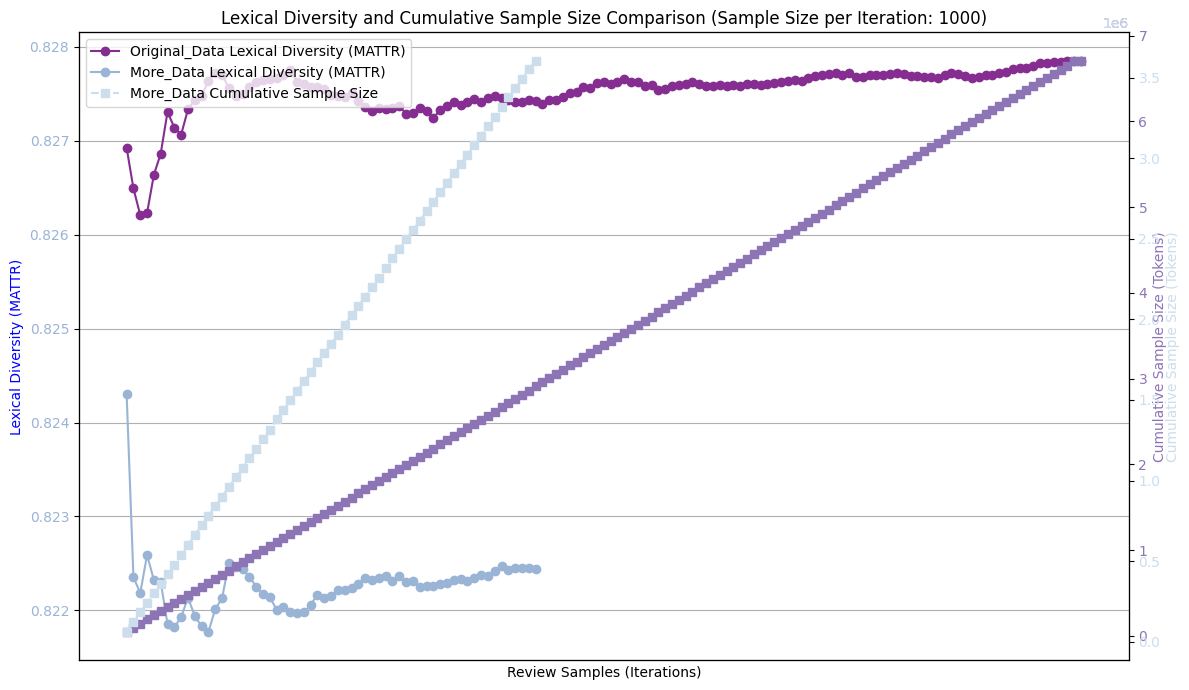

In [15]:
import preprocessing  # Assuming your calculate_lexical_diversity_optimized is in preprocessing.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, Optional, Callable, List
from tqdm import tqdm
import seaborn as sns # Import seaborn for color palettes

def calculate_lexical_diversity_optimized(df_or_path: Union[pd.DataFrame, str], window_size: int = 50, col_name: Optional[str] = None) -> tuple[float, Optional[str]]:
    """
    Calculates Moving Average Type-Token Ratio (MATTR) on a text column
    in a Pandas DataFrame or CSV file.
    Args:
        df_or_path: Pandas DataFrame or path to a CSV file.
        window_size: Window size for MATTR calculation (number of tokens in each window).
        col_name: Optional column name to use for calculation. If None, the function
                  will automatically select the longest text column (object dtype).
    Returns:
        A tuple containing:
        - MATTR score (float) or NaN if no suitable text column is found.
        - Column name used for calculation (str or None if no column was used).
    """
    if isinstance(df_or_path, str):
        try:
            df = pd.read_csv(df_or_path)
        except FileNotFoundError:
            raise FileNotFoundError(f"CSV file not found at: {df_or_path}")
    elif isinstance(df_or_path, pd.DataFrame):
        df = df_or_path
    else:
        raise TypeError("Input must be a Pandas DataFrame or a path to a CSV file.")
    object_cols = df.select_dtypes(include='object').columns
    if col_name:
        if col_name not in df.columns:
            raise ValueError(f"Column name '{col_name}' not found in DataFrame.")
        if df[col_name].dtype != 'object':
            print(f"Warning: Column '{col_name}' is not of 'object' dtype. Proceeding, but ensure it contains text data.")
        longest_text_col = col_name
    else:
        if not object_cols.any():
            return np.nan, None
        if len(object_cols) > 1:
            avg_lengths = df[object_cols].apply(lambda col: col.str.len().mean())
            longest_text_col = avg_lengths.idxmax()
        else:
            longest_text_col = object_cols[0]
    text_series = df[longest_text_col].astype(str)
    def calculate_mattr_series(text_series, window_size):
        """Calculates MATTR for a Pandas Series of text, optimized for vector operations."""
        tokenized_series = text_series.str.lower().str.findall(r'\w+')
        def get_ttr_window(tokens):
            if not tokens:
                return 0.0
            return len(set(tokens)) / len(tokens)
        mattr_scores = []
        for tokens_list in tokenized_series:
            if not tokens_list:
                mattr_scores.append(0.0)
            else:
                window_ttrs = []
                for i in range(0, len(tokens_list) - window_size + 1, 1):
                    window = tokens_list[i:i + window_size]
                    window_ttrs.append(get_ttr_window(window))
                if window_ttrs:
                    mattr_scores.append(np.mean(window_ttrs))
                else:
                    mattr_scores.append(0.0)
        return np.nanmean(mattr_scores)
    mattr_value = calculate_mattr_series(text_series, window_size)
    return mattr_value, longest_text_col


def plot_lexical_diversity_cumulative_sample_dual_df(csv_path_list: List[str], df_list: List[Optional[pd.DataFrame]],  lexical_diversity_func: Callable, text_column_name_list: List[str], df_name_list: List[str], sample_size: int = 5000, window_size: int = 50) -> plt.Figure:
    """
    Generates a line plot comparing lexical diversity and cumulative sample size for cumulatively increasing
    random samples of reviews from two different data sources, with different text columns and DataFrame names.

    Args:
        csv_path_list: List of paths to the CSV files (length 2). Use None for corresponding df_list entry.
        df_list: List of Pandas DataFrames (length 2, can be None if csv_path is provided). Use None for corresponding csv_path_list entry.
        lexical_diversity_func: Function to calculate lexical diversity.
        text_column_name_list: List of names of the text columns in each DataFrame (length 2).
        df_name_list: List of names for each DataFrame, used in plot title and legend (length 2).
        sample_size: Number of reviews to add in each iteration to the cumulative sample.
        window_size: Window size for lexical diversity calculation.

    Returns:
        A matplotlib Figure object containing the line plot.
    """
    if not csv_path_list and not df_list:
        raise ValueError("Either csv_path_list or df_list must be provided.")
    if len(csv_path_list) != 2 and len(df_list) != 2 and len(text_column_name_list) != 2 and len(df_name_list) != 2:
        raise ValueError("csv_path_list, df_list, text_column_name_list, and df_name_list must be lists of length 2.")

    fig, ax1 = plt.subplots(figsize=(12, 7))
    palette = sns.color_palette("BuPu_r", 4) # Get 4 colors from BuPu_r palette

    for i in range(2): # Iterate through two datasets
        csv_path = csv_path_list[i]
        df = df_list[i]
        text_column_name = text_column_name_list[i]
        df_name = df_name_list[i] # Get DataFrame name

        if csv_path:
            try:
                df_current = pd.read_csv(csv_path)
            except FileNotFoundError:
                raise FileNotFoundError(f"CSV file not found at: {csv_path}")
        elif df is not None:
            df_current = df
        else:
            raise ValueError(f"Both csv_path and df cannot be None for Dataset {df_name}.") # Use df_name in error message

        if text_column_name not in df_current.columns:
            raise ValueError(f"Column '{text_column_name}' not found in DataFrame '{df_name}'.") # Use df_name in error message

        text_series = df_current[text_column_name].dropna()
        all_indices = text_series.index.tolist()
        num_total_reviews = len(all_indices)
        iterations = range(1, (num_total_reviews // sample_size) + 2)

        diversity_scores = []
        cumulative_sample_counts = []
        iteration_labels = []
        sampled_indices = set()
        cumulative_reviews_text = ""

        for iteration_num in tqdm(iterations, desc=f"Processing {df_name} Cumulative Samples"): # Use df_name in tqdm desc
            remaining_indices = list(set(all_indices) - sampled_indices)
            if not remaining_indices:
                break

            current_sample_size = min(sample_size, len(remaining_indices))
            if current_sample_size <= 0:
                break

            sample_index = np.random.choice(remaining_indices, size=current_sample_size, replace=False)
            sampled_indices.update(sample_index)

            sampled_reviews = text_series.loc[sample_index]
            current_sample_reviews_text = ' '.join(sampled_reviews.astype(str))

            cumulative_reviews_text += " " + current_sample_reviews_text

            diversity_score, _ = lexical_diversity_func(pd.DataFrame({text_column_name: [cumulative_reviews_text]}), window_size=window_size, col_name=text_column_name)
            diversity_scores.append(diversity_score)
            cumulative_sample_counts.append(len(cumulative_reviews_text.split()))
            iteration_labels.append(f"Sample {iteration_num}")

        # Plotting for each dataset
        line1, = ax1.plot(iteration_labels, diversity_scores, marker='o', linestyle='-', label=f'{df_name} Lexical Diversity (MATTR)', color=palette[i*2]) # Use df_name in label
        ax1_color = palette[i*2] # Use same color for y-axis label
        ax1.tick_params(axis='y', labelcolor=ax1_color)

        ax2 = ax1.twinx()
        line2, = ax2.plot(iteration_labels, cumulative_sample_counts, marker='s', linestyle='--', label=f'{df_name} Cumulative Sample Size', color=palette[i*2+1]) # Use df_name in label
        ax2_color = palette[i*2+1] # Use same color for y-axis label
        ax2.set_ylabel("Cumulative Sample Size (Tokens)", color=ax2_color)
        ax2.tick_params(axis='y', labelcolor=ax2_color)


    ax1.set_xlabel("Review Samples (Iterations)")
    ax1.set_ylabel("Lexical Diversity (MATTR)", color='blue') # Default color, will be overridden by last dataset's color, but it's ok.
    ax1.grid(True, axis='y')
    ax1.set_title(f"Lexical Diversity and Cumulative Sample Size Comparison (Sample Size per Iteration: {sample_size})") # Generic title, can be customized further
    plt.xticks(rotation=45, ha='right')
    ax1.set_xticks([]) # Remove x-axis ticks
    plt.tight_layout()

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    return fig


path_1 = "/Users/notagain/Desktop/trust_pilot/h_stacking/trustpilot_reviews.csv"
path_2 = "/Users/notagain/final_project_results/test_/so_many_rev.csv" # Replace with your actual path



path_list = [path_1, path_2]
df_list_input = [None, None] # Or you can provide actual DataFrames here if you have them loaded
text_column_names = ['cust_review_text', 'text'] # Different column names for each dataset
df_names = ['Original_Data', 'More_Data'] # Names for DataFrames in plot

plot_dual_df = plot_lexical_diversity_cumulative_sample_dual_df(
    csv_path_list=path_list,
    df_list=df_list_input,
    lexical_diversity_func=calculate_lexical_diversity_optimized,
    text_column_name_list=text_column_names,
    df_name_list=df_names, # Pass DataFrame names here
    sample_size=1000 # Reduced sample size for dummy data
)
plot_dual_df.show()
# plot_dual_df.savefig("lexical_diversity_dual_named_df_plot.png")

In [16]:
path_1 = "/Users/notagain/Desktop/trust_pilot/h_stacking/trustpilot_reviews.csv"
path_2 = "/Users/notagain/final_project_results/test_/so_many_rev.csv" # Replace with your actual path
data_1 = pd.read_csv(path_1)
data_2 = pd.read_csv(path_2)
print(data_1.shape, data_2.shape)

(140124, 9) (60875, 2)


In [18]:

data_1.cust_rating.value_counts()

cust_rating
5    94919
1    18181
3    15215
2     7276
4     4533
Name: count, dtype: int64

In [19]:

data_2.rating.value_counts()


rating
1    12175
3    12175
2    12175
4    12175
5    12175
Name: count, dtype: int64